## Simple Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and overview check

In [2]:
df_auto = pd.read_csv('./input_data/automobileEDA.csv')
df_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## EDA

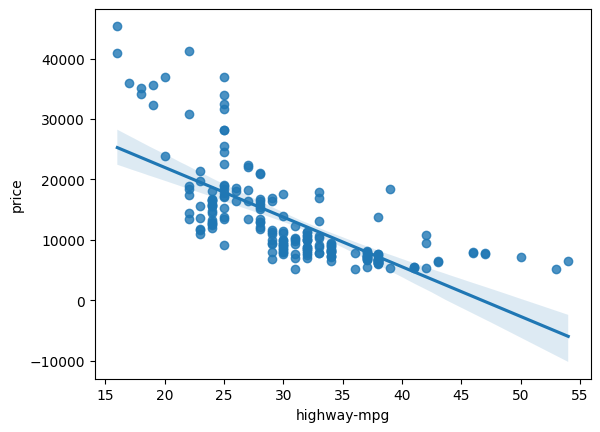

In [4]:
sns.regplot(data=df_auto, x='highway-mpg',y='price')
plt.show()

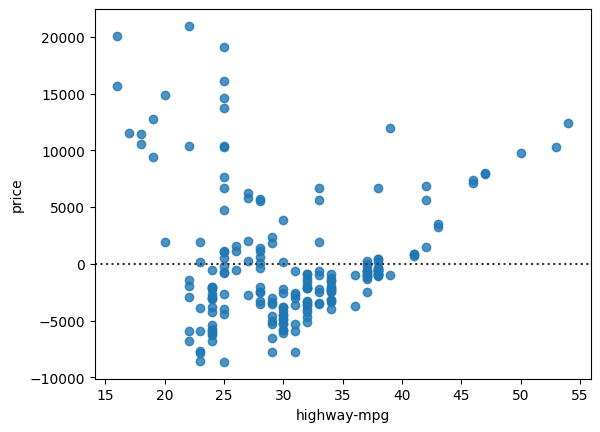

In [5]:
sns.residplot(data=df_auto, x='highway-mpg',y='price')
plt.show()

## Build Model

In [6]:
X= df_auto[['highway-mpg']]
y= df_auto[['price']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=1)

In [9]:
X_train.shape

(160, 1)

In [10]:
X_test.shape

(41, 1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predict = model.predict(X_test)

In [15]:
y_predict[0:5]

array([[10530.19044542],
       [ 7150.17926639],
       [12220.19603494],
       [10530.19044542],
       [13910.20162445]])

In [16]:
a = model.intercept_[0]
b = model.coef_[0][0]

In [17]:
print(f'price = {a} + {b} * hightway-mpg')

price = 39260.28546717645 + -845.0027947574558 * hightway-mpg


## Evaluation Model

In [18]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
full_acc = model.score(X,y)
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')
print(f'Full acc: {full_acc}')

Train acc: 0.5049421944074937
Test acc: 0.4446574660079582
Full acc: 0.49595254293727775


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')


mse: 29430822.33866017
mae: 4204.069931620724
rmse: 5425.018187864458


In [21]:
y.max(),  y.min()

(price    45400.0
 dtype: float64,
 price    5118.0
 dtype: float64)

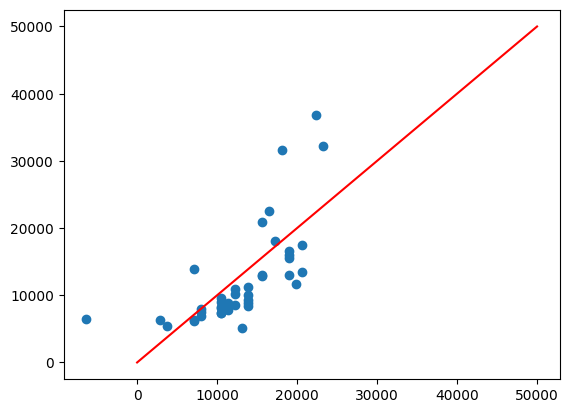

In [22]:
plt.scatter(y_predict, y_test)
plt.plot([0,50_000],[0,50_000], color='r')
plt.show()

### Polinomial Feature

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
feature = PolynomialFeatures()

In [25]:
X_poly = feature.fit_transform(X)

In [26]:
X.shape, X_poly.shape

((201, 1), (201, 3))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predict=model.predict(X_test)

### Evaluation Model

In [36]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
full_acc = model.score(X_poly,y)
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')
print(f'Full acc: {full_acc}')

Train acc: 0.6363707740680669
Test acc: 0.705481366120744
Full acc: 0.650297914309188


### Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

In [47]:
_input = [('scaler', RobustScaler()),
         ('poly',PolynomialFeatures()),
         ('model', LinearRegression())]

In [48]:
model_auto = Pipeline(_input)
model_auto

Pipeline(steps=[('scaler', RobustScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [50]:
model_auto.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [44]:
model_auto.predict(X_test)

array([[11638.68524115],
       [11638.68524115],
       [15278.63207829],
       [ 9703.09704141],
       [11638.68524115],
       [19802.45636044],
       [10621.78683878],
       [ 7153.3434034 ],
       [ 8882.61584904],
       [ 8160.34326167],
       [18196.30632805],
       [23309.38224022],
       [18196.30632805],
       [ 8882.61584904],
       [ 9703.09704141],
       [23309.38224022],
       [ 6582.77712958],
       [ 5854.27609015],
       [19802.45636044],
       [ 6253.33896222],
       [19802.45636044],
       [ 8160.34326167],
       [18196.30632805],
       [19802.45636044],
       [19802.45636044],
       [19802.45636044],
       [ 8882.61584904],
       [18196.30632805],
       [ 8160.34326167],
       [ 6582.77712958],
       [19802.45636044],
       [11638.68524115],
       [12753.79224853],
       [18196.30632805],
       [13967.10786091],
       [ 9703.09704141],
       [ 6253.33896222],
       [ 6582.77712958],
       [ 7707.78268106],
       [14338.69856471],


In [45]:
model_auto.score(X_test, y_test)

0.6209643491347393